In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
print("training Data Length: ",len(train_data))
print("test Data Length: ",len(test_data))

training Data Length:  8982
test Data Length:  2246


In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
train_labels[10]

3

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.8953 - accuracy: 0.4778 - val_loss: 1.9117 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 1.5662 - accuracy: 0.6845 - val_loss: 1.3829 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.1782 - accuracy: 0.7454 - val_loss: 1.2039 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.9711 - accuracy: 0.7853 - val_loss: 1.1022 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8092 - accuracy: 0.8211 - val_loss: 1.0354 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 0.6819 - accuracy: 0.8522 - val_loss: 0.9820 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5682 - accuracy: 0.8779 - val_loss: 0.9687 - val_accuracy: 0.7880
Epoch 8/20
16

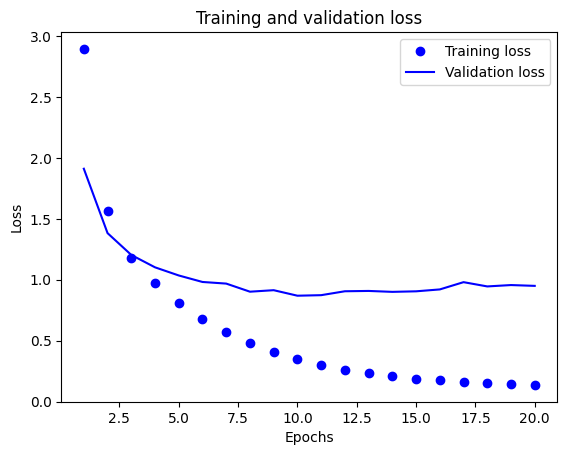

In [12]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

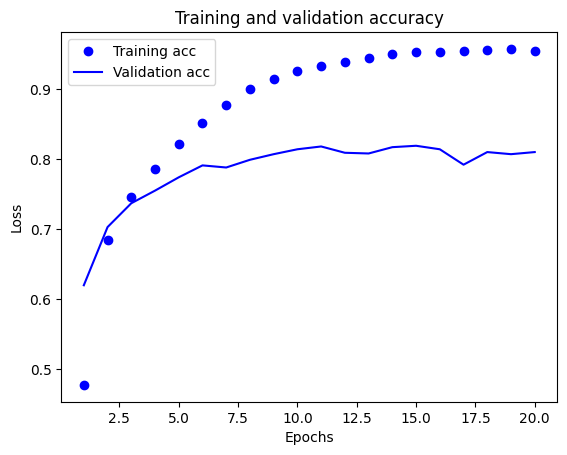

In [14]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 64ms/step - loss: 2.8341 - accuracy: 0.4867 - val_loss: 1.9097 - val_accuracy: 0.6200
Epoch 2/9
16/16 [==============================] - 1s 42ms/step - loss: 1.5749 - accuracy: 0.6779 - val_loss: 1.3870 - val_accuracy: 0.7020
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.1870 - accuracy: 0.7451 - val_loss: 1.1963 - val_accuracy: 0.7350
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.9727 - accuracy: 0.7950 - val_loss: 1.0908 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.8085 - accuracy: 0.8267 - val_loss: 1.0217 - val_accuracy: 0.7840
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6781 - accuracy: 0.8553 - val_loss: 0.9757 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 1s 52ms/step - loss: 0.5636 - accuracy: 0.8819 - val_loss: 0.9609 - val_accuracy: 0.7920
Epoch 8/9
16/16 [===

In [16]:
results


[0.9507720470428467, 0.780053436756134]